In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
FraudDS = pd.read_csv("/content/Transactions Data.csv")

In [ ]:
FraudDS.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
Frad = FraudDS[FraudDS['isFraud']==1].count()
Frad
Nofrad = FraudDS[FraudDS['isFraud']==0].count()
Nofrad
print(Frad)
print(Nofrad)
print(len(FraudDS))

step              217
type              217
amount            217
nameOrig          217
oldbalanceOrg     217
newbalanceOrig    217
nameDest          217
oldbalanceDest    217
newbalanceDest    217
isFraud           217
isFlaggedFraud    217
dtype: int64
step              422827
type              422827
amount            422827
nameOrig          422827
oldbalanceOrg     422827
newbalanceOrig    422827
nameDest          422827
oldbalanceDest    422827
newbalanceDest    422827
isFraud           422827
isFlaggedFraud    422827
dtype: int64
423044


In [ ]:
#This code will create a DataFrame and then filter it to show only the rows that contain at least one null value. The axis=1 parameter in the any() method ensures that the check is performed across columns for each row.
FraudDS[FraudDS.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
FraudDS.dropna(inplace=True)

In [ ]:
sns.set(style="whitegrid")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

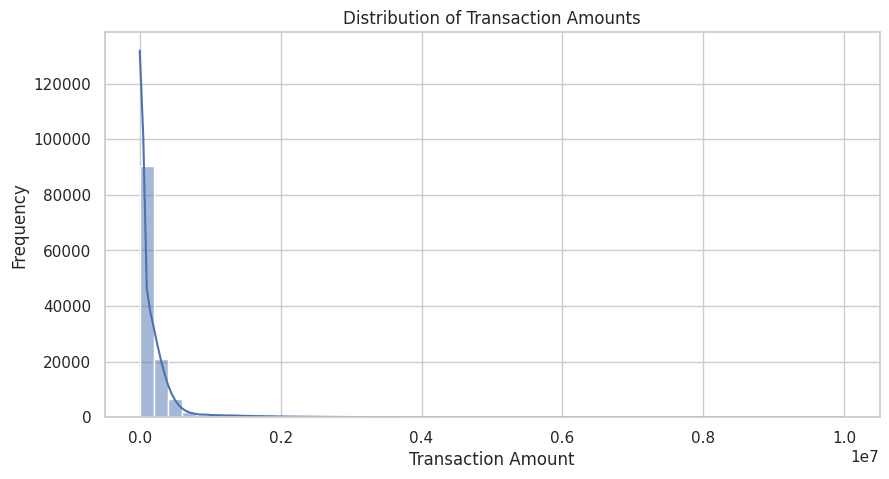

In [ ]:
#Distribution chart
plt.figure(figsize=(10, 5))
sns.histplot(FraudDS['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

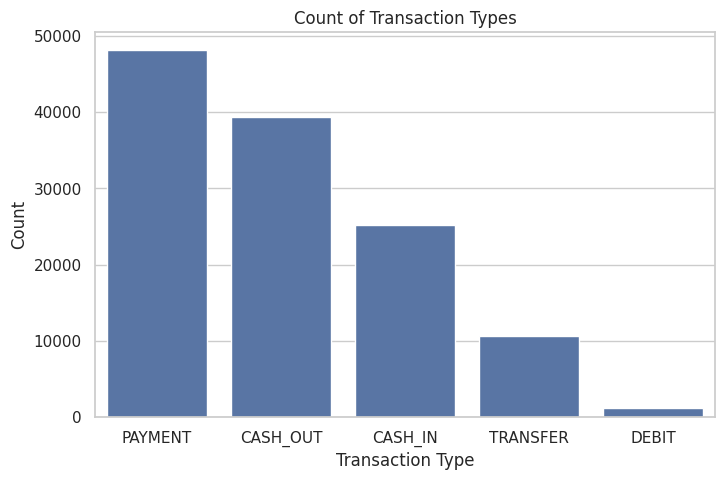

In [ ]:
#Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=FraudDS, x='type', order=FraudDS['type'].value_counts().index)
plt.title("Count of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

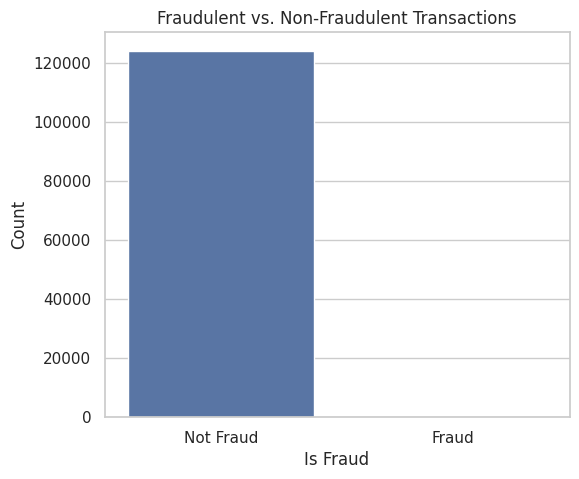

In [ ]:
#Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(6, 5))
sns.countplot(data=FraudDS, x='isFraud')
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.show()

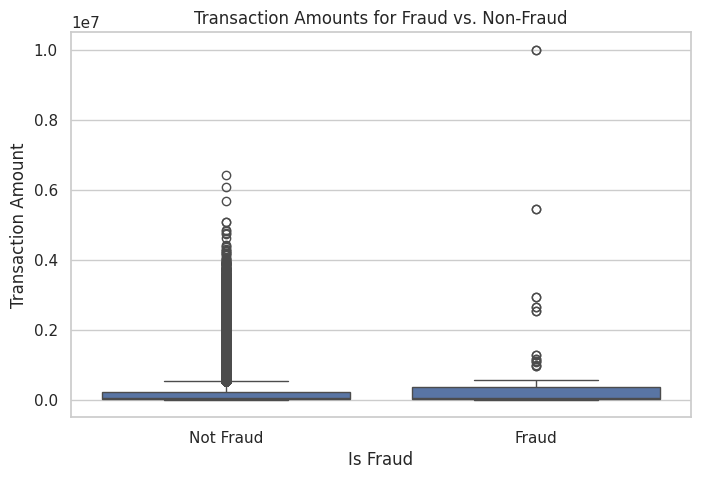

In [ ]:
#BoxPlot
plt.figure(figsize=(8, 5))
sns.boxplot(data=FraudDS, x='isFraud', y='amount')
plt.title("Transaction Amounts for Fraud vs. Non-Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.show()

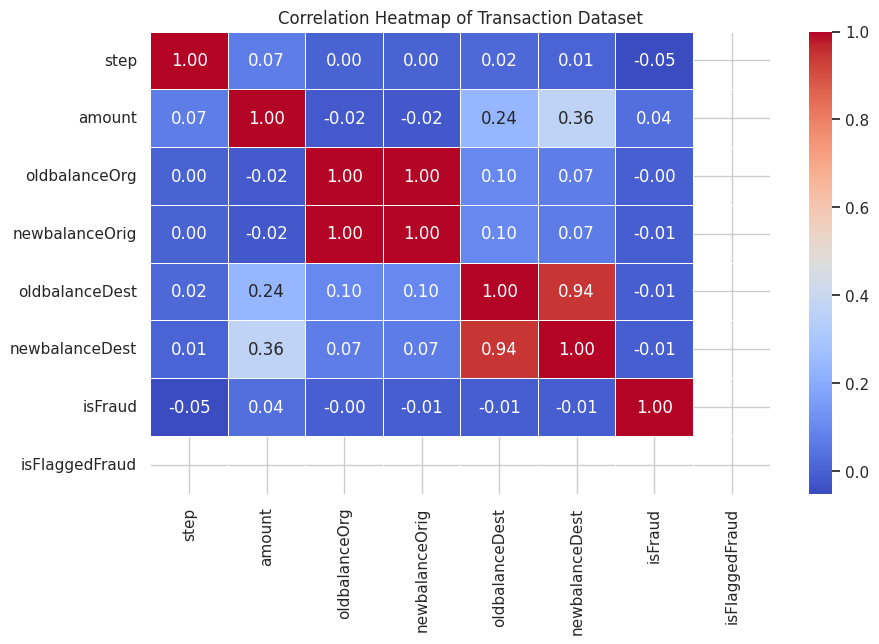

In [ ]:
#Heatmap
numeric_df = FraudDS.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Transaction Dataset")
plt.show()

In [ ]:
label_enc = LabelEncoder()
FraudDS['type'] = label_enc.fit_transform(FraudDS['type'])
FraudDS['nameOrig'] = label_enc.fit_transform(FraudDS['nameOrig'])
FraudDS['nameDest'] = label_enc.fit_transform(FraudDS['nameDest'])

In [ ]:
X = FraudDS[['type','amount', 'nameOrig', 'nameDest','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = FraudDS['isFraud'].map({1: 1, 0: 0})

In [ ]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
423039,0
423040,0
423041,0
423042,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8784349182711059
Confusion Matrix:
 [[148568  20559]
 [    12     79]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94    169127
           1       0.00      0.87      0.01        91

    accuracy                           0.88    169218
   macro avg       0.50      0.87      0.47    169218
weighted avg       1.00      0.88      0.93    169218



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    169127
           1       0.95      0.40      0.56        91

    accuracy                           1.00    169218
   macro avg       0.97      0.70      0.78    169218
weighted avg       1.00      1.00      1.00    169218



In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.97%


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=20)
xgb = XGBClassifier(n_estimators=200, scale_pos_weight=5, random_state=20)
log_reg = LogisticRegression(class_weight='balanced')

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('log_reg', log_reg)],
    final_estimator=GaussianNB()
)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))

Stacking Classifier Accuracy: 0.9977957427696817
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    169127
           1       0.15      0.68      0.25        91

    accuracy                           1.00    169218
   macro avg       0.58      0.84      0.62    169218
weighted avg       1.00      1.00      1.00    169218

